<a href="https://colab.research.google.com/github/arumshin-dev/python_conda_jupyter/blob/main/codeit/250827_%EC%BD%94%EB%94%A9%EC%8B%A4%EC%8A%B511_10_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC%EC%99%80_%EC%95%99%EC%83%81%EB%B8%94(RF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap              # 결정 경계 시각화위한 라이브러리

# 1. 단일 디시전 트리 실습

In [ ]:
# make_moons 데이터 불러오기 - 암기 X
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

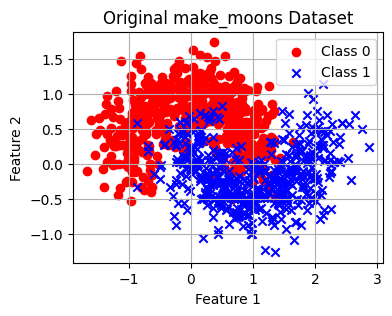

In [ ]:
# 데이터셋 시각화 (어떻게 생겼는지 눈으로 확인)
plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='red', marker='o', label='Class 0')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='blue', marker='x', label='Class 1')
plt.title('Original make_moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred_dt = dt_clf.predict(X_test)

In [ ]:
# 정확도 계산
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.9033333333333333

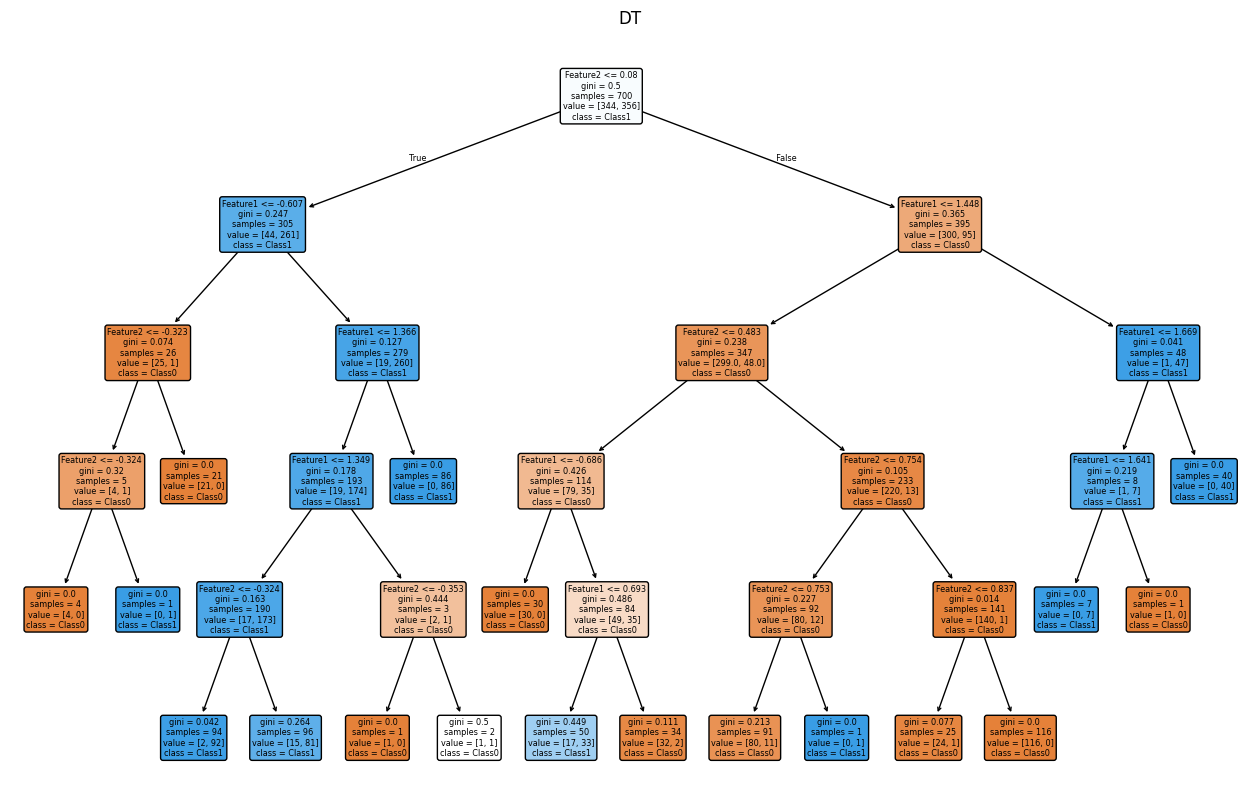

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16,10))
plot_tree(
    dt_clf,
    filled=True,
    rounded=True,
    feature_names=['Feature1', 'Feature2'],
    class_names=['Class0', 'Class1']
)
plt.title("DT")
plt.show()

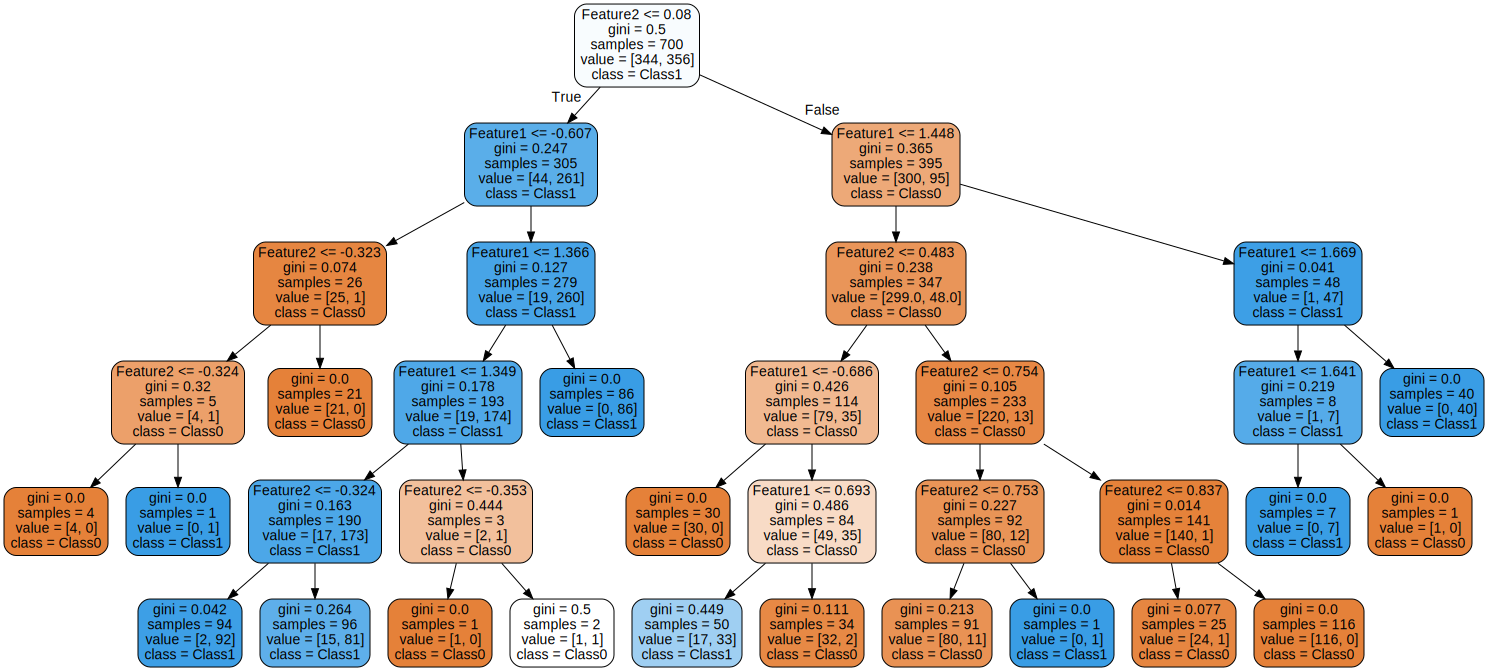

In [ ]:
# 추가 - 보기 좋은 시각화

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    dt_clf,
    feature_names=['Feature1', 'Feature2'],
    class_names=['Class0', 'Class1'],
    filled=True,
    rounded=True
)

graph = graphviz.Source(dot_data)

graph

In [ ]:
# 산점도 시각화할 함수 정의

def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    # 컬러맵 정의
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])  # 배경 색
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])   # 점 색

    # 그리드 영역 설정
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 모델로 예측한 결정 경계
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 시각화
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)  # 결정 경계 색
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

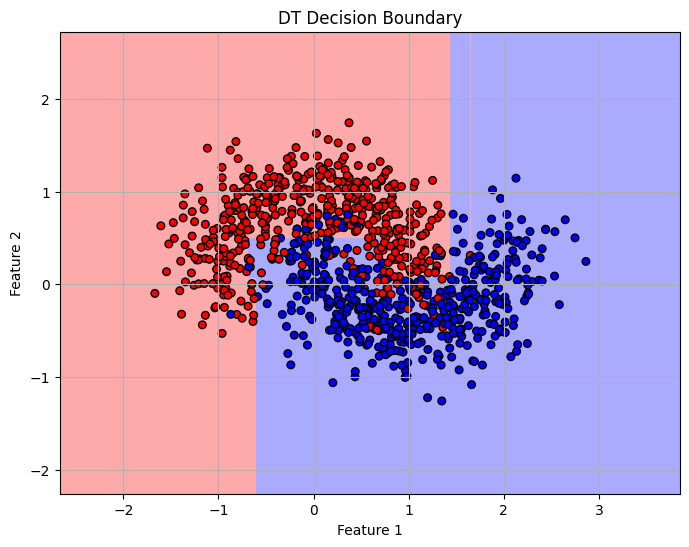

In [ ]:
plot_decision_boundary(dt_clf, X, y, title="DT Decision Boundary")

# 2. 랜덤 포레스트 실습

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, n_jobs=-1)
# n_estimators 중요!
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1)

In [ ]:
y_pred_rf = rf_clf.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.9033333333333333

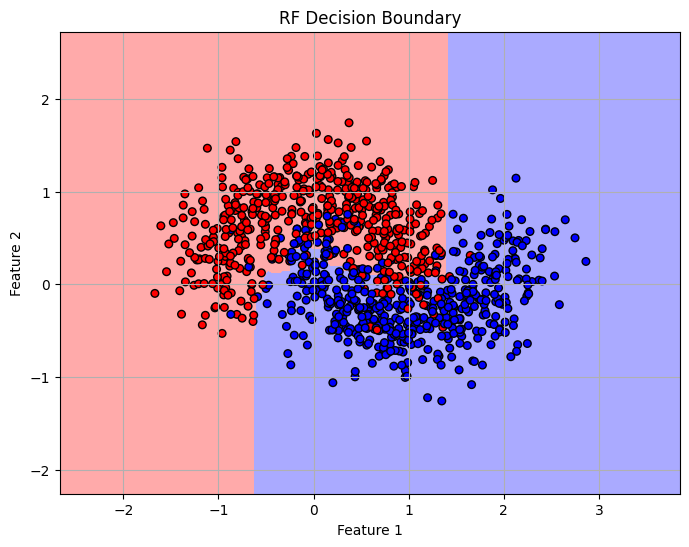

In [ ]:
plot_decision_boundary(rf_clf, X, y, title="RF Decision Boundary")